***HAZTE CON EL MEJOR!***

In [19]:
import requests
from bs4 import BeautifulSoup
from simplejson import JSONDecodeError
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import csv 
import seaborn as sns
import re

In [20]:
# Hacer una solicitud GET a la página web
url = 'https://vandal.elespanol.com/noticia/1350766721/estos-son-los-juegos-de-pokemon-mas-vendidos-de-todos-los-tiempos-cual-es-el-numero-1/'
respuesta = requests.get(url)
soup = BeautifulSoup(respuesta.content, 'html.parser')
tabla = soup.find('table')
encabezados = tabla.find_all('th')
nombres_columnas = [encabezado.text.strip() for encabezado in encabezados]

filas = tabla.find_all('tr')
datos = []

for fila in filas:
    celdas = fila.find_all('td')
    fila_datos = [celda.text.strip() for celda in celdas]
    datos.append(fila_datos)

ventas = pd.DataFrame(datos[1:], columns=nombres_columnas)
ventas

,#,Juego,Ańo,Ventas a nivel mundial,Plataforma
0,1,Pokémon Rojo y Azul,1996,"31,37 millones",Game Boy
1,2,Pokémon Espada y Escudo,2019,"26,02 millones",Nintendo Switch
2,3,Pokémon Oro y Plata,1999,"23,73 millones",Game Boy Color
3,4,Pokémon Escarlata y Púrpura,2022,"23,23 millones",Nintendo Switch
4,5,Pokémon Diamond & Pearl,2006,"17,67 millones",Nintendo DS
5,6,Pokémon X/Y,2013,"16,45 millones",Nintendo 3DS
6,7,Pokémon Rubí y Zafiro,2002,"16,22 millones",Game Boy Advance
7,8,Pokémon Sol y Luna,2016,"16,18 millones",Nintendo 3DS
8,9,Pokémon Edición Negra y Blanca,2010,"15,64 millones",Nintendo DS
9,10,"Pokémon: Let's Go, Pikachu! / Let's Go, Eevee!",2018,"15,07 millones",Nintendo Switch


In [21]:
ventas["Ventas a nivel mundial"] = ventas["Ventas a nivel mundial"].str.replace(" millones", "").str.replace(",", ".")
ventas

,#,Juego,Ańo,Ventas a nivel mundial,Plataforma
0,1,Pokémon Rojo y Azul,1996,31.37,Game Boy
1,2,Pokémon Espada y Escudo,2019,26.02,Nintendo Switch
2,3,Pokémon Oro y Plata,1999,23.73,Game Boy Color
3,4,Pokémon Escarlata y Púrpura,2022,23.23,Nintendo Switch
4,5,Pokémon Diamond & Pearl,2006,17.67,Nintendo DS
5,6,Pokémon X/Y,2013,16.45,Nintendo 3DS
6,7,Pokémon Rubí y Zafiro,2002,16.22,Game Boy Advance
7,8,Pokémon Sol y Luna,2016,16.18,Nintendo 3DS
8,9,Pokémon Edición Negra y Blanca,2010,15.64,Nintendo DS
9,10,"Pokémon: Let's Go, Pikachu! / Let's Go, Eevee!",2018,15.07,Nintendo Switch


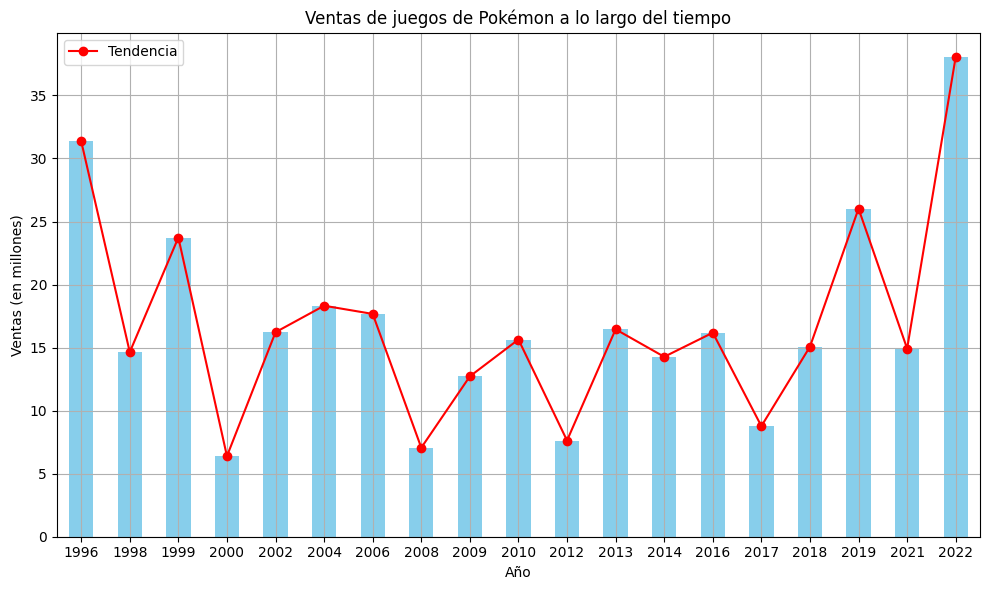

In [22]:
import matplotlib.pyplot as plt

# Convertir la columna "Ventas a nivel mundial" a cadena (string) y limpiar las cadenas
ventas["Ventas a nivel mundial"] = ventas["Ventas a nivel mundial"].astype(str).str.replace(" millones", "").str.replace(",", "").astype(float)

# Supongamos que tenemos una columna llamada "Año de lanzamiento"
# Reemplaza "Año de lanzamiento" con el nombre real de tu columna de tiempo si es diferente
ventas_por_anio = ventas.groupby("Ańo")["Ventas a nivel mundial"].sum()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ventas_por_anio.plot(kind='bar', color='skyblue')

# Añadir una línea para indicar la tendencia
ventas_por_anio.plot(kind='line', color='red', marker='o')

# Etiquetas y título
plt.xlabel("Año")
plt.ylabel("Ventas (en millones)")
plt.title("Ventas de juegos de Pokémon a lo largo del tiempo")

# Mostrar el gráfico
plt.grid(True)
plt.legend(['Tendencia'])
plt.tight_layout()
plt.show()


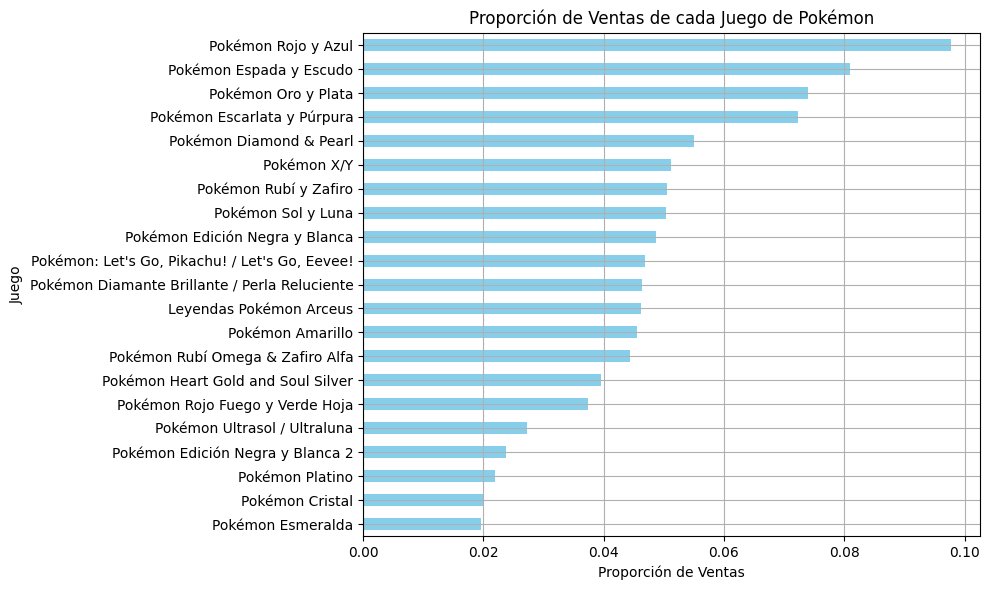

In [23]:
import matplotlib.pyplot as plt

# Calcular la proporción de ventas de cada juego
proporcion_ventas = ventas.groupby("Juego")["Ventas a nivel mundial"].sum() / ventas_totales

# Ordenar los juegos por proporción de ventas
proporcion_ventas = proporcion_ventas.sort_values(ascending=True)

# Crear el gráfico de barras horizontales
plt.figure(figsize=(10, 6))
proporcion_ventas.plot(kind='barh', color='skyblue')

# Título y etiquetas
plt.xlabel('Proporción de Ventas')
plt.ylabel('Juego')
plt.title('Proporción de Ventas de cada Juego de Pokémon')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()




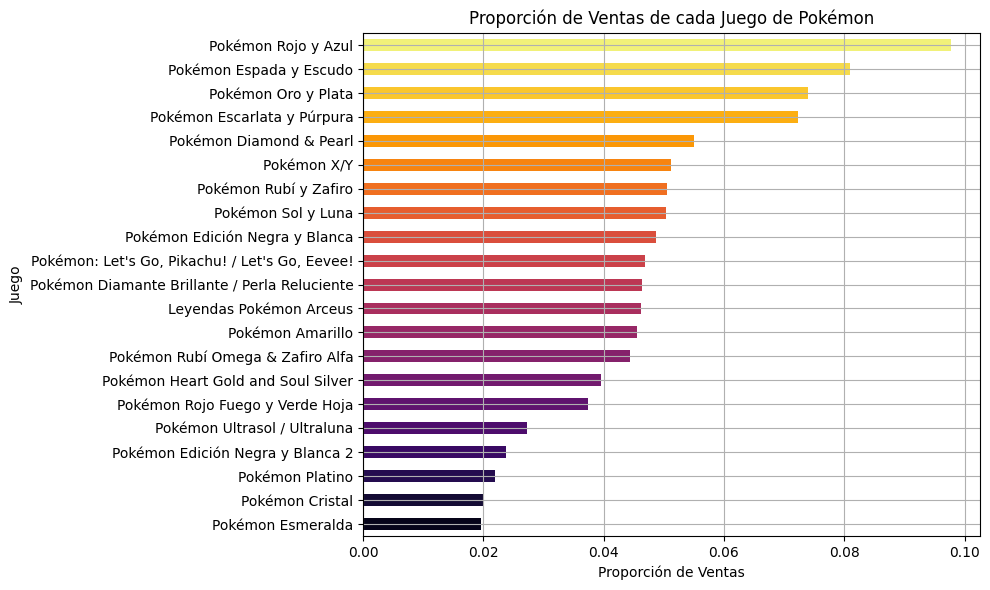

In [24]:

# Calcular la proporción de ventas de cada juego
proporcion_ventas = ventas.groupby("Juego")["Ventas a nivel mundial"].sum() / ventas_totales

# Ordenar los juegos por proporción de ventas
proporcion_ventas = proporcion_ventas.sort_values(ascending=True)

# Elegir una paleta de colores
paleta_colores = sns.color_palette("inferno", len(proporcion_ventas))

# Crear el gráfico de barras horizontales con colores diferentes para cada juego
plt.figure(figsize=(10, 6))
proporcion_ventas.plot(kind='barh', color=paleta_colores)

# Título y etiquetas
plt.xlabel('Proporción de Ventas')
plt.ylabel('Juego')
plt.title('Proporción de Ventas de cada Juego de Pokémon')

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# Cargar datos del dataframe con el que vamos a trabajar
pokemon = pd.read_csv('pokemons2.csv')
pokemon

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe..."
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,The plant blooms when it is absorbing solar en...
3,4,charmander,ordinary,generation-i,nothing,fire,NaN,39,52,43,60,50,65,309,6,85,blaze solar-power,"Obviously prefers hot places. When it rains, s..."
4,5,charmeleon,ordinary,generation-i,charmander,fire,NaN,58,64,58,80,65,80,405,11,190,blaze solar-power,"When it swings its burning tail, it elevates t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,raging-bolt,ordinary,generation-ix,nothing,electric,dragon,125,73,91,137,89,75,590,52,4800,protosynthesis,Not Available
1021,1022,iron-boulder,ordinary,generation-ix,nothing,rock,psychic,90,120,80,68,108,124,590,15,1625,quark-drive,Not Available
1022,1023,iron-crown,ordinary,generation-ix,nothing,steel,psychic,90,72,100,122,108,98,590,16,1560,quark-drive,Not Available
1023,1024,terapagos,legendary,generation-ix,nothing,normal,NaN,90,65,85,65,85,60,450,2,65,tera-shift,Not Available


In [26]:
# Eliminar las columnas que no vamos a necesitar
columnas_a_eliminar = ['abilities','desc','height','weight']
pokemon = pokemon.drop(columnas_a_eliminar, axis=1)
pokemon

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525
3,4,charmander,ordinary,generation-i,nothing,fire,NaN,39,52,43,60,50,65,309
4,5,charmeleon,ordinary,generation-i,charmander,fire,NaN,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,raging-bolt,ordinary,generation-ix,nothing,electric,dragon,125,73,91,137,89,75,590
1021,1022,iron-boulder,ordinary,generation-ix,nothing,rock,psychic,90,120,80,68,108,124,590
1022,1023,iron-crown,ordinary,generation-ix,nothing,steel,psychic,90,72,100,122,108,98,590
1023,1024,terapagos,legendary,generation-ix,nothing,normal,NaN,90,65,85,65,85,60,450


In [27]:
# Método para llenar los valores nulos de 'type2' con los valores de 'type1'
def filltype(df):
    df['type2'] = df['type2'].fillna(df['type1'])

    
filltype(pokemon)
pokemon


,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525
3,4,charmander,ordinary,generation-i,nothing,fire,fire,39,52,43,60,50,65,309
4,5,charmeleon,ordinary,generation-i,charmander,fire,fire,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,raging-bolt,ordinary,generation-ix,nothing,electric,dragon,125,73,91,137,89,75,590
1021,1022,iron-boulder,ordinary,generation-ix,nothing,rock,psychic,90,120,80,68,108,124,590
1022,1023,iron-crown,ordinary,generation-ix,nothing,steel,psychic,90,72,100,122,108,98,590
1023,1024,terapagos,legendary,generation-ix,nothing,normal,normal,90,65,85,65,85,60,450


In [28]:
# Aplicar la capitalización del título a todas las celdas que contienen texto
pokemon = pokemon.map(lambda x: x.title() if isinstance(x, str) else x)
pokemon

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
0,1,Bulbasaur,Ordinary,Generation-I,Nothing,Grass,Poison,45,49,49,65,65,45,318
1,2,Ivysaur,Ordinary,Generation-I,Bulbasaur,Grass,Poison,60,62,63,80,80,60,405
2,3,Venusaur,Ordinary,Generation-I,Ivysaur,Grass,Poison,80,82,83,100,100,80,525
3,4,Charmander,Ordinary,Generation-I,Nothing,Fire,Fire,39,52,43,60,50,65,309
4,5,Charmeleon,Ordinary,Generation-I,Charmander,Fire,Fire,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging-Bolt,Ordinary,Generation-Ix,Nothing,Electric,Dragon,125,73,91,137,89,75,590
1021,1022,Iron-Boulder,Ordinary,Generation-Ix,Nothing,Rock,Psychic,90,120,80,68,108,124,590
1022,1023,Iron-Crown,Ordinary,Generation-Ix,Nothing,Steel,Psychic,90,72,100,122,108,98,590
1023,1024,Terapagos,Legendary,Generation-Ix,Nothing,Normal,Normal,90,65,85,65,85,60,450


In [29]:
# Función para eliminar 'Generation-' y dejar solo el número romano en mayúsculas
def clean_generation(cell_value):
    # Utilizar una expresión regular para encontrar 'Generation-' seguido de números romanos
    result = re.search(r'Generation-(\w+)', cell_value)
    if result:
        return result.group(1).upper()  # Devolver el número romano en mayúsculas
    else:
        return cell_value  # Devolver el valor original si no se encuentra 'Generation-'

# Aplicar la función a la columna 'generation'
pokemon['generation'] = pokemon['generation'].apply(clean_generation)

# Cambiar los numeros romanos de la columna generación a arábigos para evitar problemas con las gráficas
roman_to_arabic = {
    'I': 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'V': 5,
    'VI': 6,
    'VII': 7,
    'VIII': 8,
    'IX': 9
}

# Establecer la opción para optar por el comportamiento futuro
pd.set_option('future.no_silent_downcasting', True)

# Mapear los números romanos a números arábigos en la columna 'generation'
pokemon['generation'] = pokemon['generation'].replace(roman_to_arabic)

In [30]:
# Reemplazo 'Nothing' por 'Original' en la columna 'evolves from'
pokemon['evolves_from'] = pokemon['evolves_from'].replace('Nothing', 'Original')
pokemon

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
0,1,Bulbasaur,Ordinary,1,Original,Grass,Poison,45,49,49,65,65,45,318
1,2,Ivysaur,Ordinary,1,Bulbasaur,Grass,Poison,60,62,63,80,80,60,405
2,3,Venusaur,Ordinary,1,Ivysaur,Grass,Poison,80,82,83,100,100,80,525
3,4,Charmander,Ordinary,1,Original,Fire,Fire,39,52,43,60,50,65,309
4,5,Charmeleon,Ordinary,1,Charmander,Fire,Fire,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging-Bolt,Ordinary,9,Original,Electric,Dragon,125,73,91,137,89,75,590
1021,1022,Iron-Boulder,Ordinary,9,Original,Rock,Psychic,90,120,80,68,108,124,590
1022,1023,Iron-Crown,Ordinary,9,Original,Steel,Psychic,90,72,100,122,108,98,590
1023,1024,Terapagos,Legendary,9,Original,Normal,Normal,90,65,85,65,85,60,450


In [31]:
# Guardo el dataset en tres formatos distintos 
pokemon.to_csv('pokemon.csv', index=False)
pokemon.to_excel('pokemon.xlsx', index=False)
pokemon.to_json('pokemon.json', orient='records')

In [47]:
pokemon.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1025.0,513.000000,296.036315,1.0,257.0,513.0,769.0,1025.0
hp,1025.0,70.184390,26.631054,1.0,50.0,68.0,85.0,255.0
atk,1025.0,77.521951,29.782541,5.0,55.0,75.0,100.0,181.0
def,1025.0,72.507317,29.286972,5.0,50.0,70.0,90.0,230.0
spatk,1025.0,70.080976,29.658378,10.0,47.0,65.0,90.0,173.0
spdef,1025.0,70.205854,26.639329,20.0,50.0,67.0,86.0,230.0
speed,1025.0,67.186341,28.717227,5.0,45.0,65.0,88.0,200.0
total,1025.0,427.686829,112.770735,175.0,325.0,450.0,508.0,720.0


In [52]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         1025 non-null   int64 
 1   name          1025 non-null   object
 2   rank          1025 non-null   object
 3   generation    1025 non-null   object
 4   evolves_from  1025 non-null   object
 5   type1         1025 non-null   object
 6   type2         1025 non-null   object
 7   hp            1025 non-null   int64 
 8   atk           1025 non-null   int64 
 9   def           1025 non-null   int64 
 10  spatk         1025 non-null   int64 
 11  spdef         1025 non-null   int64 
 12  speed         1025 non-null   int64 
 13  total         1025 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 112.2+ KB


In [53]:
pokemon.head(10)

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
0,1,Bulbasaur,Ordinary,1,Original,Grass,Poison,45,49,49,65,65,45,318
1,2,Ivysaur,Ordinary,1,Bulbasaur,Grass,Poison,60,62,63,80,80,60,405
2,3,Venusaur,Ordinary,1,Ivysaur,Grass,Poison,80,82,83,100,100,80,525
3,4,Charmander,Ordinary,1,Original,Fire,Fire,39,52,43,60,50,65,309
4,5,Charmeleon,Ordinary,1,Charmander,Fire,Fire,58,64,58,80,65,80,405
5,6,Charizard,Ordinary,1,Charmeleon,Fire,Flying,78,84,78,109,85,100,534
6,7,Squirtle,Ordinary,1,Original,Water,Water,44,48,65,50,64,43,314
7,8,Wartortle,Ordinary,1,Squirtle,Water,Water,59,63,80,65,80,58,405
8,9,Blastoise,Ordinary,1,Wartortle,Water,Water,79,83,100,85,105,78,530
9,10,Caterpie,Ordinary,1,Original,Bug,Bug,45,30,35,20,20,45,195


In [54]:
pokemon.tail(10)

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
1015,1016,Fezandipiti,Legendary,9,Original,Poison,Fairy,88,91,82,70,125,99,555
1016,1017,Ogerpon,Legendary,9,Original,Grass,Grass,80,120,84,60,96,110,550
1017,1018,Archaludon,Ordinary,9,Duraludon,Steel,Dragon,90,105,130,125,65,85,600
1018,1019,Hydrapple,Ordinary,9,Dipplin,Grass,Dragon,106,80,110,120,80,44,540
1019,1020,Gouging-Fire,Ordinary,9,Original,Fire,Dragon,105,115,121,65,93,91,590
1020,1021,Raging-Bolt,Ordinary,9,Original,Electric,Dragon,125,73,91,137,89,75,590
1021,1022,Iron-Boulder,Ordinary,9,Original,Rock,Psychic,90,120,80,68,108,124,590
1022,1023,Iron-Crown,Ordinary,9,Original,Steel,Psychic,90,72,100,122,108,98,590
1023,1024,Terapagos,Legendary,9,Original,Normal,Normal,90,65,85,65,85,60,450
1024,1025,Pecharunt,Mythical,9,Original,Poison,Ghost,88,88,160,88,88,88,600


In [109]:
# Creo una lista con los colores en funcion del tipo para poder recurrir a ellos en las distintas graficas
pkmn_type_colors = [
    '#78C850',  # Grass
    '#F08030',  # Fire
    '#6890F0',  # Water
    '#A8B820',  # Bug
    '#A8A878',  # Normal
    '#A040A0',  # Poison
    '#F8D030',  # Electric
    '#E0C068',  # Ground
    '#EE99AC',  # Fairy
    '#C03028',  # Fighting
    '#F85888',  # Psychic
    '#B8A038',  # Rock
    '#705898',  # Ghost
    '#98D8D8',  # Ice
    '#7038F8',  # Dragon
    '#000000',  # Dark
    '#C0C0C0',  # Steel
    '#87CEEB',  # Flying
]

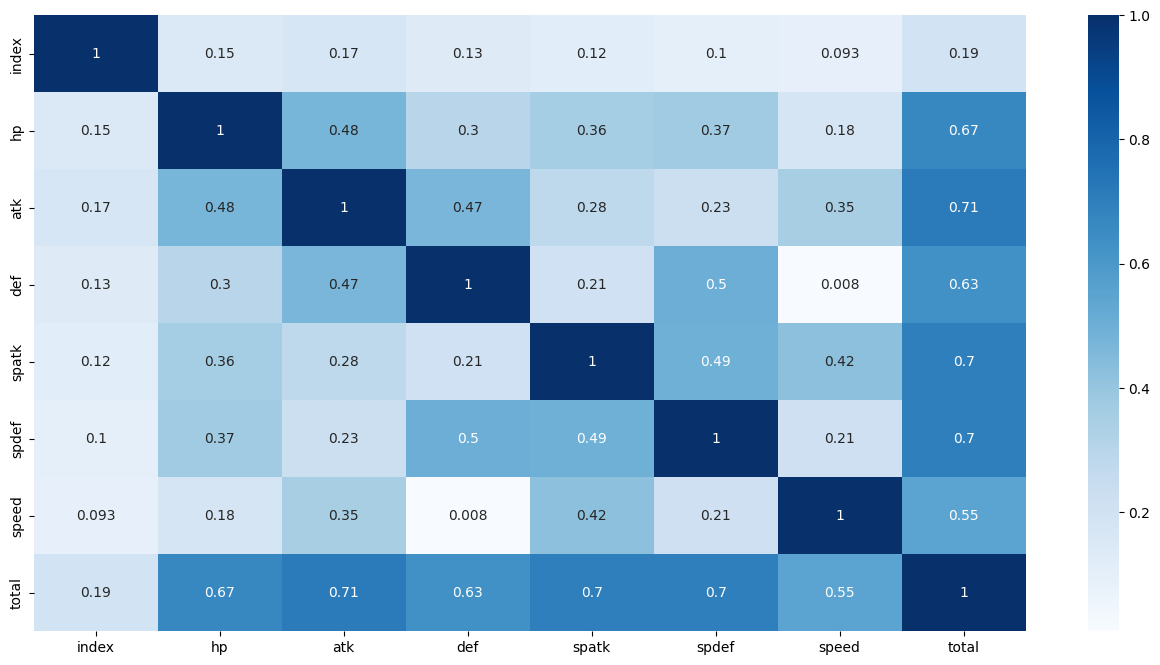

In [32]:
# Seleccionar solo las columnas numéricas del DataFrame
columnas_numericas = pokemon.select_dtypes(include=['int64', 'float64'])

# Calcular la correlación entre las características numéricas
correlacion = columnas_numericas.corr()

# Visualizar la correlación
plt.figure(figsize=(16,8))
sns.heatmap(correlacion, annot=True, cmap='Blues')
plt.show()


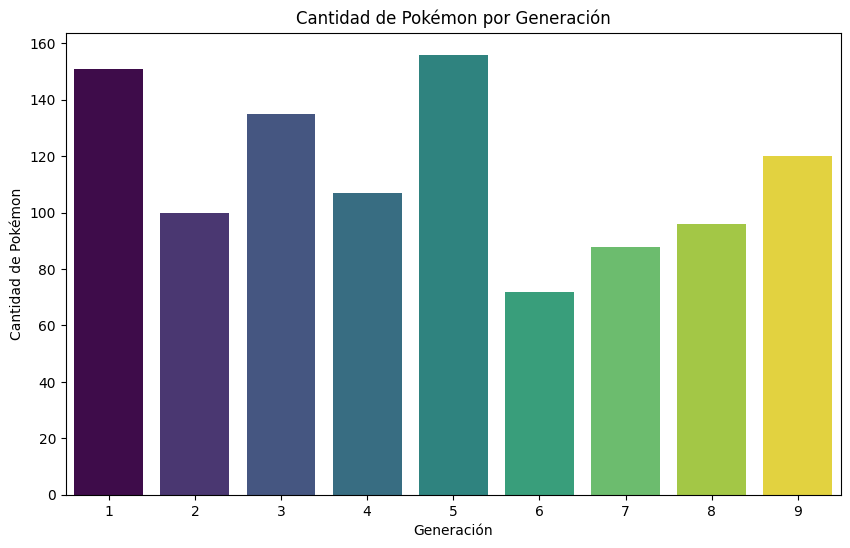

In [33]:
# Contar la cantidad de Pokémon por generación y ordenar por el número de generación
pokemon_por_generacion = pokemon['generation'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=pokemon_por_generacion.index, y=pokemon_por_generacion.values, hue=pokemon_por_generacion.index, palette='viridis', legend=False)
plt.title('Cantidad de Pokémon por Generación')
plt.xlabel('Generación')
plt.ylabel('Cantidad de Pokémon')
plt.show()

<Figure size 1500x800 with 0 Axes>

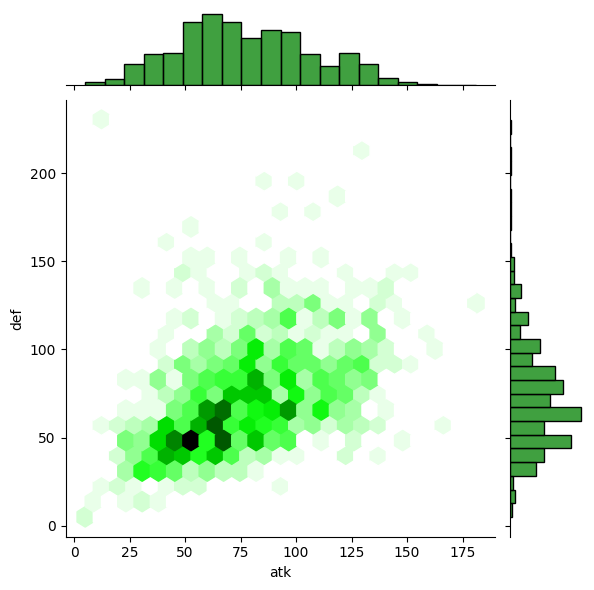

In [45]:
plt.figure(figsize=(15,8))
sns.jointplot(x='atk', y='def', kind='hex', data=pokemon , color= 'green')
plt.show()

<Figure size 1500x800 with 0 Axes>

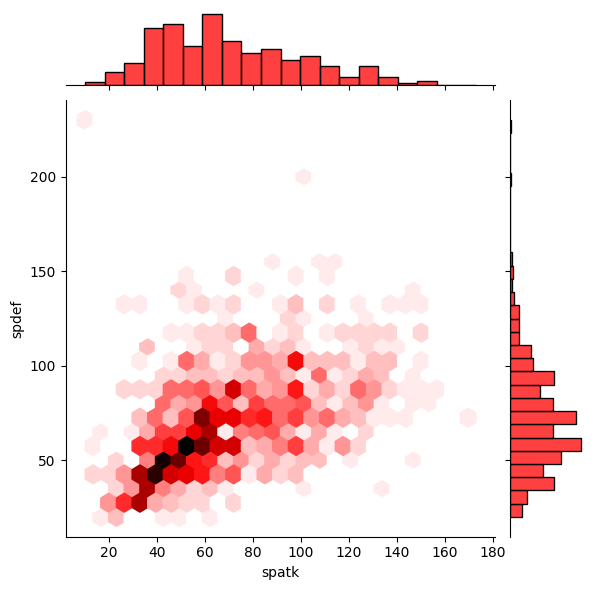

In [43]:
plt.figure(figsize=(15, 8))
sns.jointplot(x="spatk", y="spdef", data=pokemon, kind="hex", color="red")
plt.show()


In [62]:
# Calcular la frecuencia de cada valor único en la columna "evolves from"
frecuencia_valores = pokemon['evolves_from'].value_counts()

# Seleccionar los tres valores más repetidos
top_valores_repetidos = frecuencia_valores.head(2)

print("Los valores más repetidos en la columna 'evolves from' son:")
print(top_valores_repetidos)


Los valores más repetidos en la columna 'evolves from' son:
evolves_from
Original    541
Eevee         8
Name: count, dtype: int64


In [81]:
# Filtrar la columna "evolves_from" excluyendo el valor "original"
datos_filtrados = pokemon[pokemon['evolves_from'] != 'Original']

# Contar la frecuencia de cada valor único en la columna "evolves_from"
conteo_valores = datos_filtrados['evolves_from'].value_counts()
conteo_valores.head(20)

evolves_from
Eevee        8
Applin       3
Tyrogue      3
Kirlia       2
Slowpoke     2
Wooper       2
Sneasel      2
Nincada      2
Poliwhirl    2
Charcadet    2
Gloom        2
Scyther      2
Meowth       2
Burmy        2
Yamask       2
Snorunt      2
Wurmple      2
Clamperl     2
Cosmoem      2
Bunnelby     1
Name: count, dtype: int64

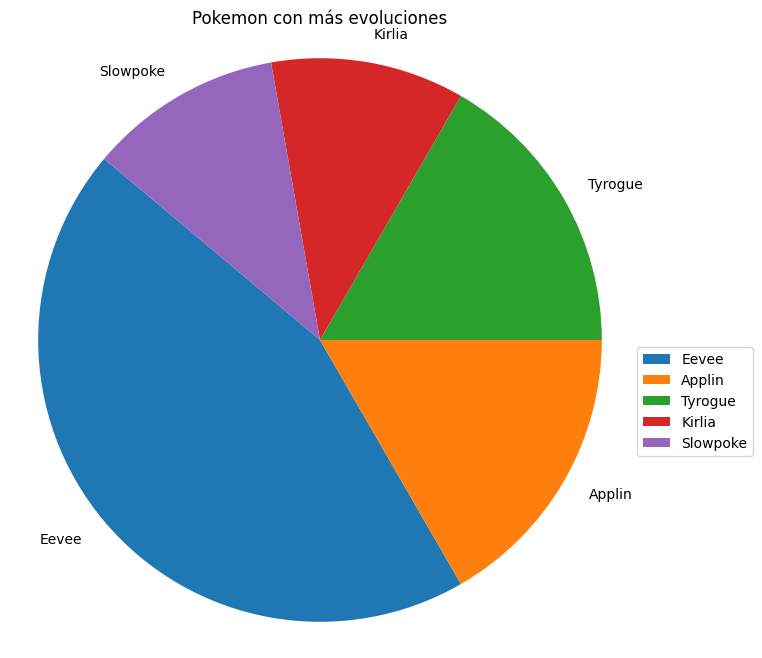

In [95]:
import matplotlib.pyplot as plt

# Filtrar la columna "evolves_from" excluyendo el valor "original"
datos_filtrados = pokemon[pokemon['evolves_from'] != 'Original']

# Contar la frecuencia de cada valor único en la columna "evolves_from"
conteo_valores = datos_filtrados['evolves_from'].value_counts()

# Filtrar los valores más comunes (excluyendo "original") para el gráfico
top_valores = conteo_valores.head(5)

# Crear el gráfico de tarta
plt.figure(figsize=(8, 8))
plt.pie(top_valores, labels=top_valores.index, startangle=140)
plt.title('Pokemon con más evoluciones')
plt.axis('equal')  # Para asegurarse de que el gráfico sea circular


plt.legend(labels=top_valores.index, loc='upper left', bbox_to_anchor=(1, 0.5))
plt.show()

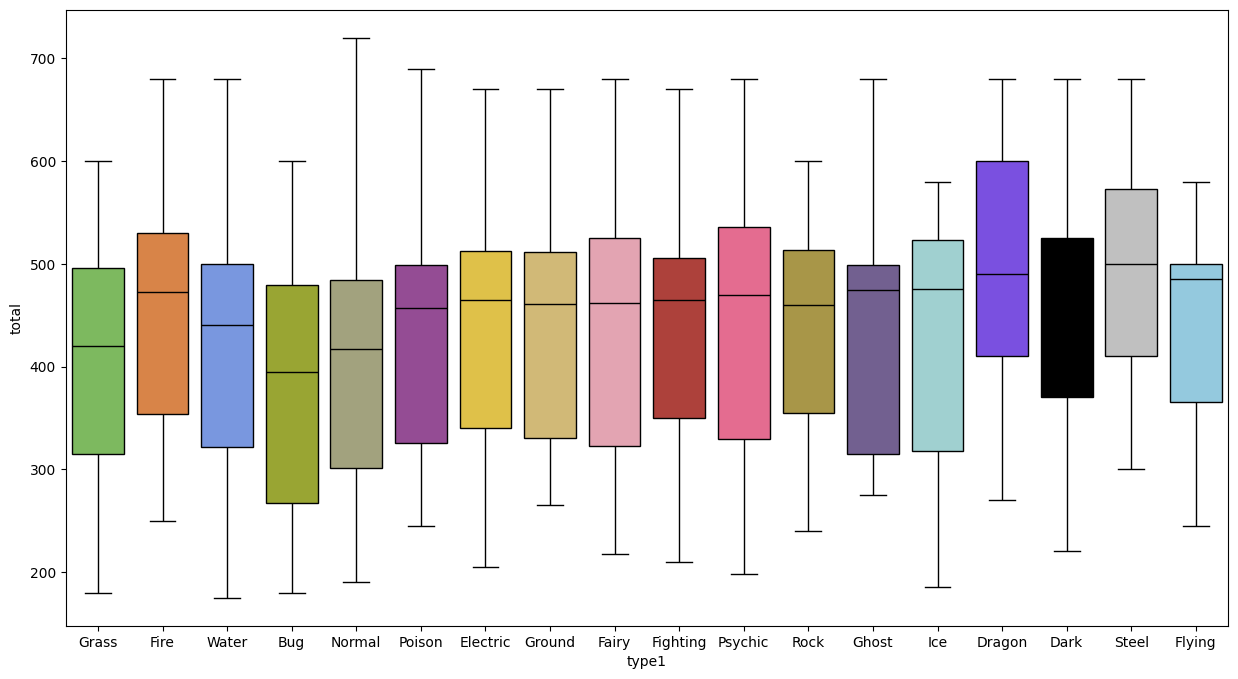

In [110]:
# Comparando la relacion del total de puntos con el tipo del pokemon
plt.figure(figsize=(15, 8))
sns.boxplot(x=pokemon['type1'], y=pokemon['total'], hue=pokemon['type1'], palette=pkmn_type_colors, legend=False)
plt.show()

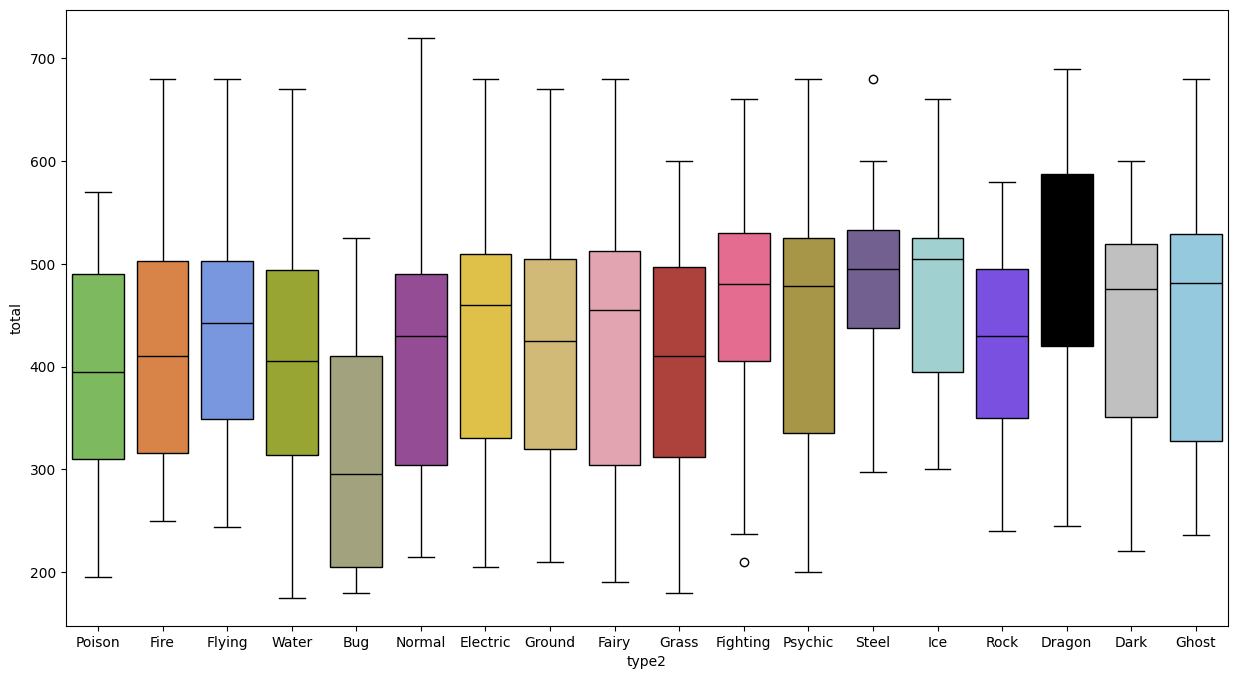

In [111]:
# Comparando la relacion del total de puntos con el tipo 2 del pokemon
plt.figure(figsize=(15, 8))
sns.boxplot(x=pokemon['type2'], y=pokemon['total'], hue=pokemon['type2'], palette=pkmn_type_colors, legend=False)
plt.show()

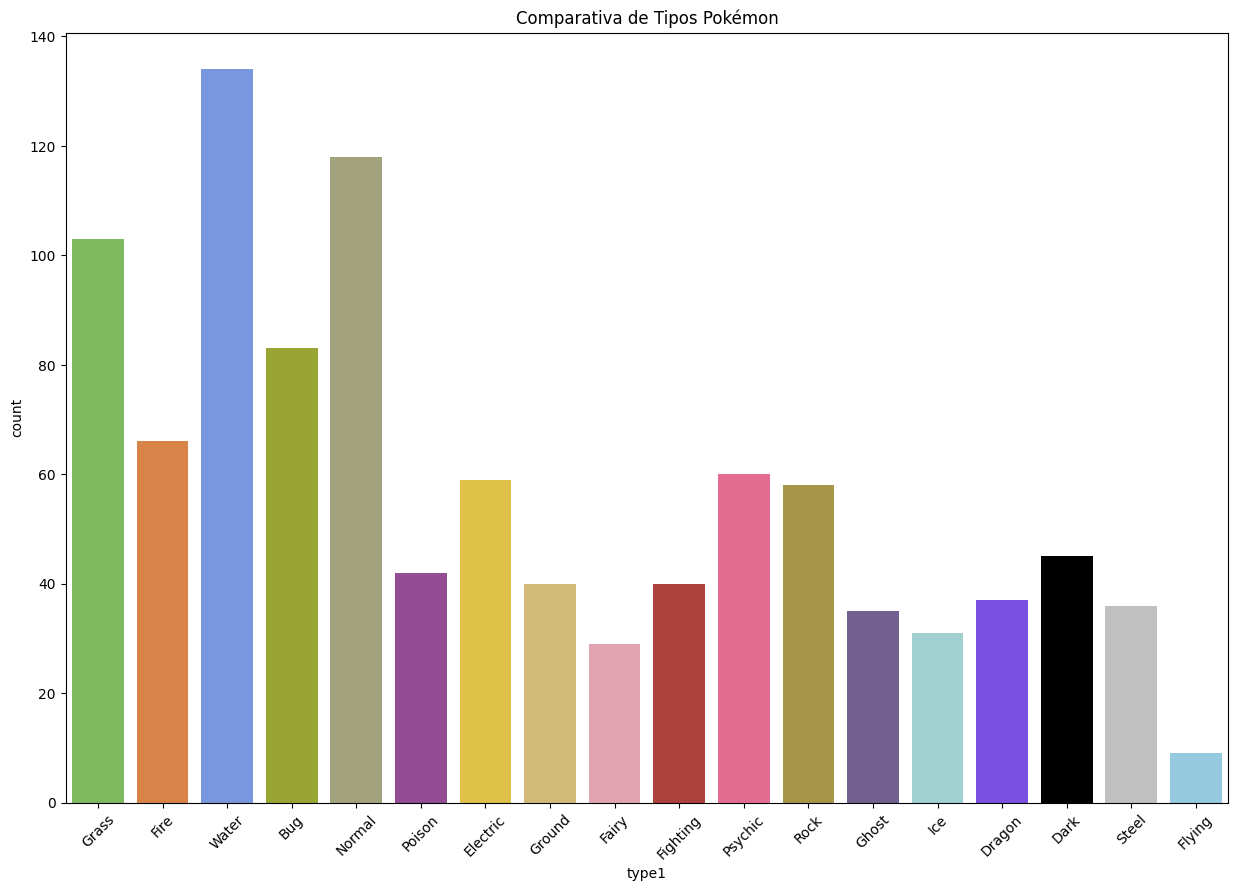

In [108]:
plt.figure(figsize=(15, 10))
sns.countplot(x='type1', data=pokemon, hue='type1', legend=False, palette=pkmn_type_colors)
plt.xticks(rotation=45)
plt.title('Comparativa de Tipos Pokémon')
plt.show()

In [131]:
# Metodo para comparar atributos pokemon
def compara(p1, p2, c):
    comp = pokemon[(pokemon['name'] == p1) | (pokemon['name'] == p2)]
    sns.barplot(x = 'name', y = c, data = comp,hue= 'name', legend=False, palette = "Set1")

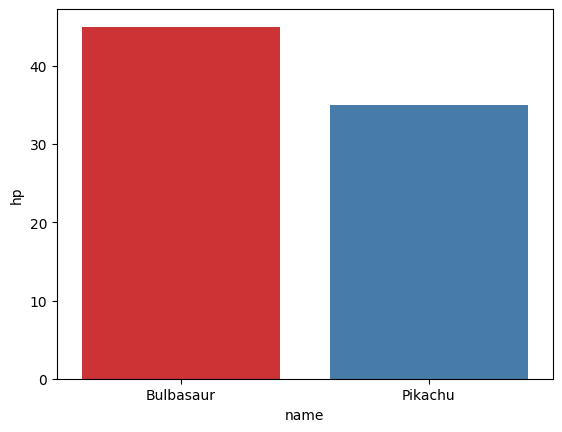

In [132]:
compara('Pikachu', 'Bulbasaur', 'hp')

In [120]:
pokemon

,index,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total
0,1,Bulbasaur,Ordinary,1,Original,Grass,Poison,45,49,49,65,65,45,318
1,2,Ivysaur,Ordinary,1,Bulbasaur,Grass,Poison,60,62,63,80,80,60,405
2,3,Venusaur,Ordinary,1,Ivysaur,Grass,Poison,80,82,83,100,100,80,525
3,4,Charmander,Ordinary,1,Original,Fire,Fire,39,52,43,60,50,65,309
4,5,Charmeleon,Ordinary,1,Charmander,Fire,Fire,58,64,58,80,65,80,405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,1021,Raging-Bolt,Ordinary,9,Original,Electric,Dragon,125,73,91,137,89,75,590
1021,1022,Iron-Boulder,Ordinary,9,Original,Rock,Psychic,90,120,80,68,108,124,590
1022,1023,Iron-Crown,Ordinary,9,Original,Steel,Psychic,90,72,100,122,108,98,590
1023,1024,Terapagos,Legendary,9,Original,Normal,Normal,90,65,85,65,85,60,450
